## Project: Deep Learning - CNN Classification
## Dataset: MNIST Handwritten Digits (from keras)

##### Step 1: Import Libraries 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

##### Step 2: Load Dataset

In [5]:
# Load MNIST dataset from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


##### TODO: Normalize the images (divide by 255.0)


In [6]:
X_train = X_train.astype('float32') / 255.0                        # normalize X_train
X_test = X_test.astype('float32') / 255.0                         # normalize X_test

##### TODO: Reshape the data to include channel dimension (28,28,1)


In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


##### TODO: One-hot encode the labels using to_categorical


In [8]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)

y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


#####  Step 3: Explore Dataset 


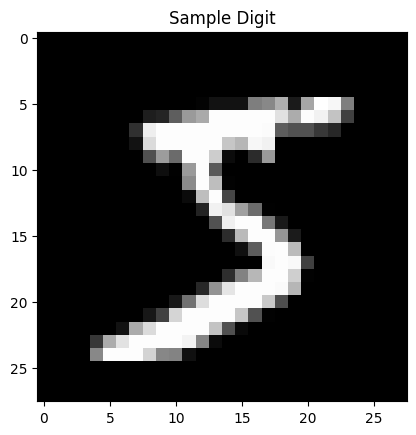

In [9]:
# Plot an example digit
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("Sample Digit")
plt.show()

In [10]:
# Print shape of data
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)



##### Step 4: Build CNN Model 


In [11]:
model = Sequential()

##### TODO: Add a Conv2D layer with 32 filters, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)


In [24]:
from tensorflow.keras.layers import Input, MaxPooling2D, Conv2D, Flatten , Dense , Dropout
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

##### TODO: Add a MaxPooling2D layer (pool_size=(2,2))


In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

##### TODO: Add another Conv2D layer with 64 filters and relu activation


In [19]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

##### TODO: Add another MaxPooling2D layer

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))

##### TODO: Flatten the output

In [21]:
model.add(Flatten())

##### TODO: Add a Dense layer with 128 neurons and relu activation

In [23]:
model.add(Dense(128, activation='relu'))

##### TODO: Add Dropout layer (rate=0.5)

In [25]:
model.add(Dropout(0.5))

##### TODO: Add the output Dense layer with 10 neurons and softmax activation


In [26]:
model.add(Dense(10, activation='softmax'))

##### Compile the model

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model = Sequential()

# 1st conv block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd conv block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten before dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer – 10 classes for MNIST
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#####  Step 5: Train the Model 



In [31]:
history = model.fit(
    X_train, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8980 - loss: 0.3335 - val_accuracy: 0.9808 - val_loss: 0.0656
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9696 - loss: 0.1031 - val_accuracy: 0.9865 - val_loss: 0.0476
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9776 - loss: 0.0782 - val_accuracy: 0.9882 - val_loss: 0.0414
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9812 - loss: 0.0620 - val_accuracy: 0.9903 - val_loss: 0.0348
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9907 - val_loss: 0.0369


#####  Step 6: Evaluate the Model 
##### - Evaluate model on test data

In [32]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_cat, verbose=0)

print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


Test Loss: 0.0319959819316864
Test Accuracy: 0.9891999959945679


#####  Step 7: Plot Training History 
##### - Plot training and validation accuracy

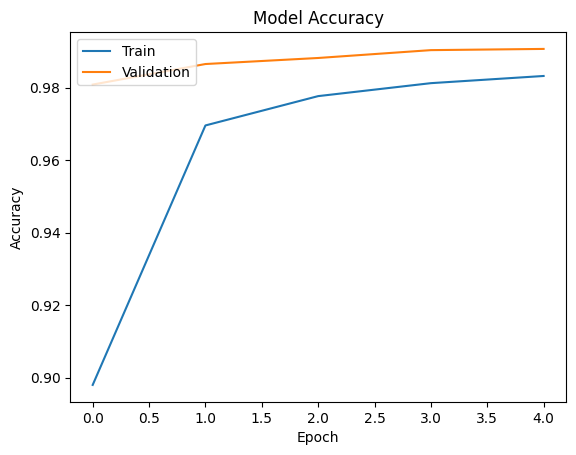

In [33]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


##### - Plot training and validation loss curves

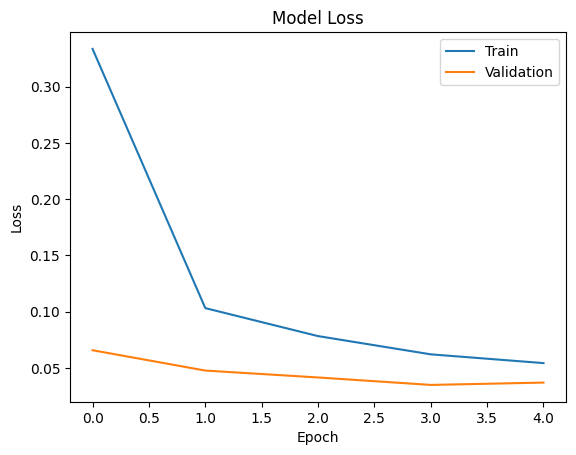

In [34]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


In [35]:
model.save("mnist_model.h5")
